# Load the data from a pickle/HDF5 file

In [37]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [128]:
%time df = pd.read_pickle("data/to_pickle.pk1.xz")

Wall time: 2.23 s


In [4]:
df.head()

,frame,x,y,obj,size,seq,filename,start,path_time,delta_time
0,0,14,329,0,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
1,0,4,291,1,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
2,0,629,7,2,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
3,0,253,4,3,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
4,0,185,4,4,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00


## What are the largest / smallest x and y values on the file?

In [9]:
x_max = df['x'].max()
x_max

637

In [8]:
y_max = df['y'].max()
y_max

357

## How many times an object is located in pixel x=121 y=251 ?

In [12]:
len(df[(df['y'] == 251) & (df['x'] == 121)])

1

## Add more tasks from the original document here...

## How many pixels on the picture are visited at least once

In [75]:
duplicate_bool = df.duplicated(subset=['x', 'y'], keep='first')
len(df.loc[duplicate_bool == False])

104910

## Draw a heatmap according to the number of times each pixel is visited (in the same size as the image.)

## +Using alpha and maskedarray draw the heat map on the background image

In [78]:
groupby_x_y = df.groupby(['x','y']).size().sort_values()
groupby_x_y = groupby_x_y.reset_index()
groupby_x_y
groupby_x_y.columns = ['x','y','times']
groupby_x_y =  groupby_x_y[groupby_x_y['times'] >= 10]
groupby_x_y

,x,y,times
56917,527,103,10
56918,145,132,10
56919,22,249,10
56920,244,88,10
56921,145,252,10
56922,513,170,10
56923,81,220,10
56924,145,141,10
56925,176,131,10
56926,176,98,10


In [79]:
im = imread('data/paths0.png')
mat = ones(im.shape)
mat[groupby_x_y.y, groupby_x_y.x] = 0

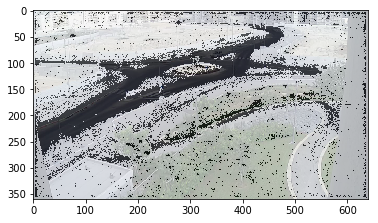

In [80]:
imshow(im)
imshow(mat,alpha=0.6)

# Part 2.2: demo_objects.ipynb


## How many distinct objects are in the file

In [115]:
groupby_obj = df.groupby(['filename','obj']).agg({'seq': ['max']})
len(groupby_obj)


24599

In [121]:
groupby_obj

seq
                                               max
filename                                  obj     
 -16\20170820143029_100.h264.txt          22    10
 .h264.txt                                4      6
                                          13   168
 0.h264.txt                               39    14
 0003141_100.h264.txt                     6    253
                                          7     42
                                          8    111
                                          9      5
                                          10    10
 0041952_100.h264.txt                     7    194
                                          8     43
                                          9     51
                                          10     9
                                          11    46
                                          12     1
                                          13     0
 0095531_100.h264.txt                     77   408
                                          78   256
                                          79    49
                                          80    11
                                          81     1
                                          82     7
 0114208_100.h264.txt                     20   589
                                          21     0
                                          22    16
                                          23     0
 0134406_100.h264.txt                     2    196
                                          3      0
                                          4      7
 0153127_100.h264.txt                     17   398
...                                            ...
 p\cctv\14-16\20170817182813_100.h264.txt 2    250
 v10014-16\20170817012709_100.h264.txt    52    22
 v10014-16\20170817015738_100.h264.txt    380   86
 v10014-16\20170817022803_100.h264.txt    6    166
 v10014-16\20170817152551_100.h264.txt    13   163
 v10014-16\20170819010919_100.h264.txt    11     1
 v10014-16\20170819161019_100.h264.txt    20     0
 v10014-16\20170820003141_100.h264.txt    8     84
 v10014-16\20170820095531_100.h264.txt    77   400
 v10014-16\20170820134406_100.h264.txt    3      0
 v10014-16\20170820153127_100.h264.txt    18     0
 v10014-16\20170820180348_100.h264.txt    52   103
 v10014-16\20170820203719_100.h264.txt    40    13
 v10014-16\20170822085521_100.h264.txt    18    17
 v10014-16\20170822105708_100.h264.txt    2    475
 v10014-16\20170822121142_100.h264.txt    137  231
 v10014-16\20170822142906_100.h264.txt    78   627
 v10014-16\20170822190323_100.h264.txt    105   29
 v10014-16\20170822211834_100.h264.txt    12     8
 v10014-16\20170823044223_100.h264.txt    58     0
 v10014-16\20170823062855_100.h264.txt    12   199
 v10014-16\20170823083020_100.h264.txt    22   187
 v10014-16\20170823101544_100.h264.txt    274   13
 v10014-16\20170823114728_100.h264.txt    12   567
 v10014-16\20170823133413_100.h264.txt    78     8
 v10014-16\20170823204132_100.h264.txt    32    35
 v10014-16\20170824043058_100.h264.txt    127  226
 v10014-16\20170824083405_100.h264.txt    0     75
 v10014-16\20170824122055_100.h264.txt    42    10
v10014-16\20170822142906_100.h264.txt     93   212

[24599 rows x 1 columns]

## What is the largest sequence number? What object has the largest sequence number?

In [162]:
max_seq = int(df['seq'].max())
df[df.seq == max_seq].groupby(['filename','obj']).size()



filename                            obj
 14-16\20170817161123_100.h264.txt  16     43
dtype: int64

## How many objects have sequence larger than 20?

In [160]:
len(df[df.seq >= 20].groupby(['filename','obj']))


14277

## What is the mean sequence for  all objects?

In [164]:
int(df.seq.mean())

115

## Show a histogram for sequence/number of objects.


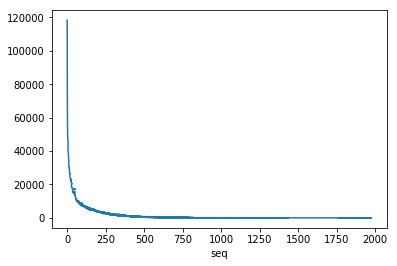

In [167]:
df.groupby(['seq']).size().sort_values().plot()